Uploaded by: Andressa Moreira

# Overview 0
Wellcome, <br>
this colab is about Iris Flowers: a famous machine learning classification problem. <br>
The goal is to create a model that classifies the categorical variable (setosa, virginica or versicolor) based in some probability. <br> Let's get it started!! \o/

# Loading the dataset 1
First of all we will import some libraries for analysis and model building:

In [63]:
import numpy as np
import pandas as pd

# statistical data visualization library based on matplotlib 
import seaborn as sns 
sns.set_palette('husl') 

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [64]:
dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
col_name = ["sepal-lenght", "sepal-width", "petal-lenght","petal-width","class"]

# Reading the .csv file
dataset = pd.read_csv(dataset_url, names = col_name)

# Summarize the Dataset 2

## Dataset overview

Dataset contains the data for this project in comma-separated values (CSV) format. The number of columns is 5, and the number of rows is 150.

In [65]:
print("Dataset shape:", dataset.shape, " => 150 rows and 5 columns \n")
dataset.head(67) # The head() function is used to get the first n rows. By default: n = 5

Dataset shape: (150, 5)  => 150 rows and 5 columns 



,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
62,6.0,2.2,4.0,1.0,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor


***So, in dataset representation above what exactly are the features (vector $X \in \mathbb{R^ {n_x \times m}}$) of this Iris Machine Learning Classification problem? Well, the features are those sepal and petal lenght and width..***

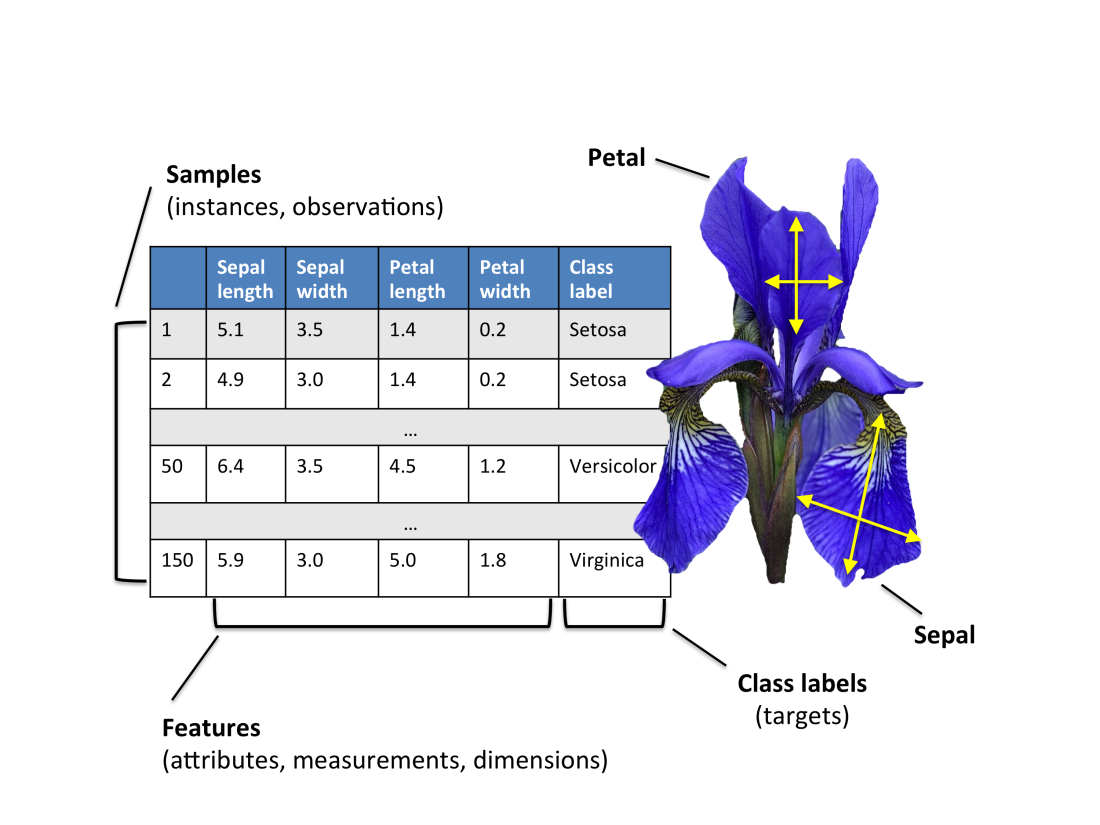

In [66]:
# used to print a concise summary of a DataFrame. 
# This method prints information about a DataFrame 
# including the index dtype and column dtypes, non-null values and memory usage.
dataset.info(verbose=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 5 entries, sepal-lenght to class
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
# Descriptive statistics: this method returns many scatter metrics: std, count, min, max, percentil ... 
# Where each colum (iri's class) has it's respective computation done 
dataset.describe() 

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
dataset.groupby("class")

We can see all classes, but this unorganized output does not mean much

In [69]:
dataset.groupby(dataset["class"])

In [70]:
dataset["class"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

Text(0.5, 1.0, "Number of dataset's class")

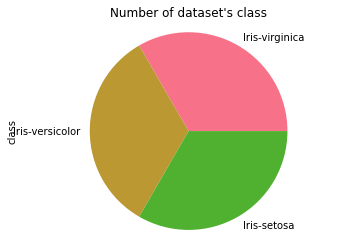

In [71]:
dataset['class'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title("Number of dataset's class")

# Data Visualization 3


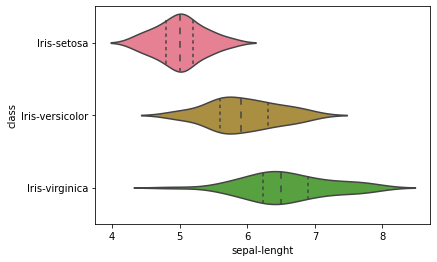

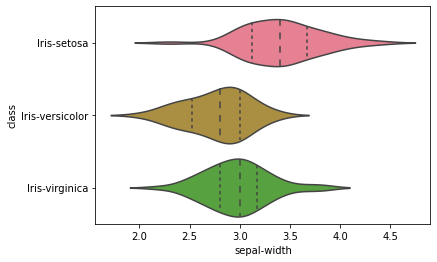

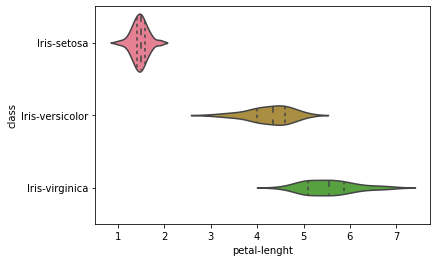

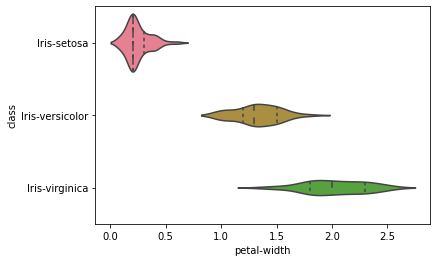

In [72]:
sns.violinplot(y='class', x='sepal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

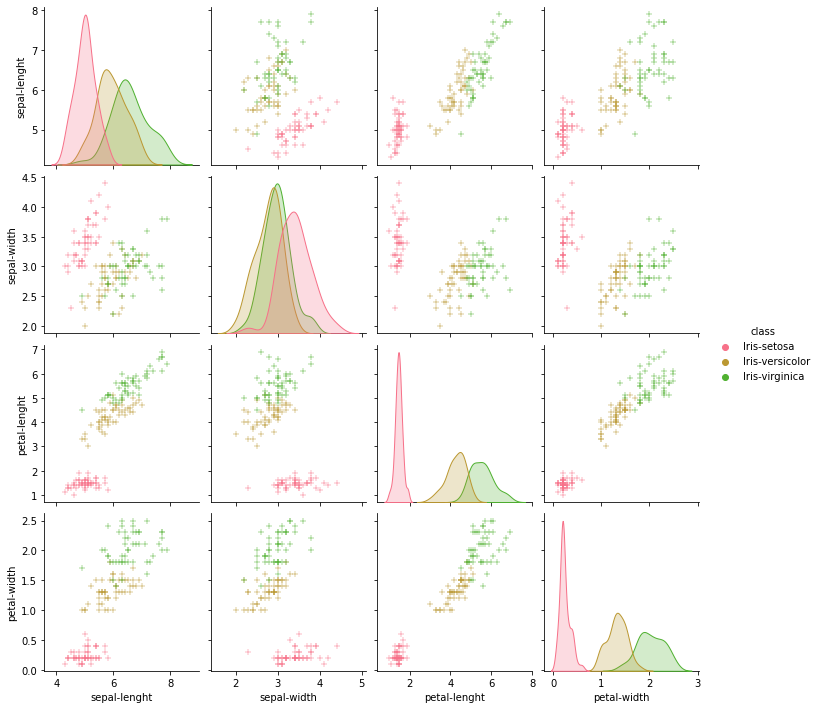

In [73]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

In [74]:
dataset['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

From the above, we can see that Iris-Setosa is separated from both other species in all the features.

**Heat map overview: definition and examples in numpy** <br>
**heat map (ou mapa de calor) is a visualization technique where it is able to show the correlation among variables through intensity of colors.** 

<AxesSubplot:>

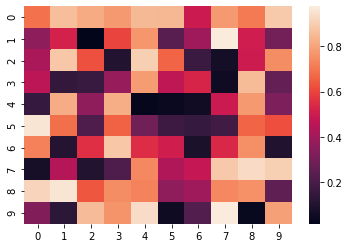

In [75]:
import numpy as np
myarray = np.random.rand(10,10)
sns.heatmap(myarray)

In the example above we can see that random.rand in creation of np array is definitely random because no array value is super/sub(estimate), they occur equally

# Model Building 4

## Spliting the dataset 4.1
X = is having all the INdependent variable <br>
Y = is having all the DEpendent variable 

In [76]:
x = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'x shape: {x.shape} | y shape: {y.shape} ')

x shape: (150, 4) | y shape: (150,) 


***about axis in pandas: <br>***
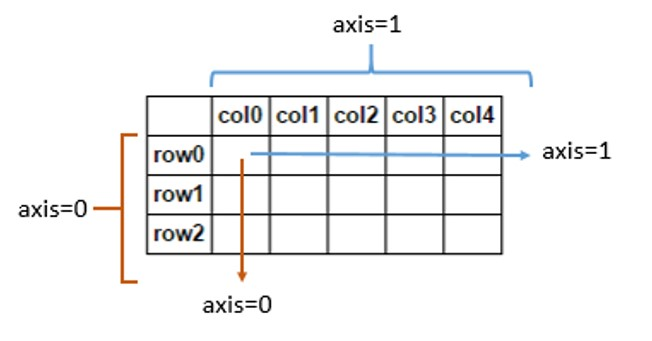

In [77]:
x

,sepal-lenght,sepal-width,petal-lenght,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

### Train and Test Split 4.1.2

Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

x and y has 120 lenght (150 * 80%) because 80% of entire dataset I designed to train part

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [80]:
x_train


,sepal-lenght,sepal-width,petal-lenght,petal-width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [81]:
y_train

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
            ...       
133     Iris-virginica
137     Iris-virginica
72     Iris-versicolor
140     Iris-virginica
37         Iris-setosa
Name: class, Length: 120, dtype: object

In [82]:
x_test

,sepal-lenght,sepal-width,petal-lenght,petal-width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [83]:
y_test

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
56     Iris-versicolor
141     Iris-virginica
44         Iris-setosa
29         Iris-setosa
120     Iris-virginica
94     Iris-versicolor
5          Iris-setosa
102     Iris-virginica
51     Iris-versicolor
78     Iris-versicolor
42         Iris-setosa
92     Iris-versicolor
66     Iris-versicolor
31         Iris-setosa
35         Iris-setosa
90     Iris-versicolor
84     Iris-versicolor
77     Iris-versicolor
40         Iris-setosa
125     Iris-virginica
99     Iris-versicolor
33         Iris-setosa
19         Iris-setosa
73     Iris-versicolor
146     Iris-virginica
Name: class, dtype: object

## Model Creation 4.2


We don’t know which algorithms would be best for this problem.
Let’s check each algorithm in loop and print its accuracy, so that we can select our best algorithm.
**Let’s test 6 different algorithms:**
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM)

Remeber those sklearn imports? In the following snippet were are going to invoke those ML algorithms to check which is better to train our model

In [84]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# evaluate each model in turn
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/adilson/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/adilson/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)


Based on above output, support Vector Classifier (**SVC**) is   performing better than otheralgorithms: <br>
LR: 0.966667 (0.040825) <br>
LDA: 0.975000 (0.038188)<br>
KNN: 0.958333 (0.041667)<br>
CART: 0.941667 (0.038188)<br>
NB: 0.950000 (0.055277)<br>
**SVC: 0.983333 (0.033333)**


Let’s train SVC model on our training set and predict on test set in the next step.

## Model Creation 4.3



In [85]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.coef_
y_train.shape


(120,)

In [86]:
model.intercept_

array([  9.54041496,   1.610632  , -11.15104696])

In [87]:
x_train

,sepal-lenght,sepal-width,petal-lenght,petal-width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [88]:
model.coef_

array([[-0.4345272 ,  0.81754718, -2.35369834, -0.97519974],
       [ 0.61879329, -0.42290961, -0.204655  , -0.82624438],
       [-0.18426609, -0.39463757,  2.55835334,  1.80144412]])

In [89]:
model.predict([[3, 2, 4, 0.2]])

array(['Iris-versicolor'], dtype=object)

In [90]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)

SVC(gamma='auto')

In [91]:
prediction = model.predict(x_test)

In [92]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Measurement model
Data scientist deal with metrics everyday in terms of model evaluation. 
<br>
Measure the performance of a model: **"how wrong is this"?**<br> 
1. Accuracy <br>
2. Precision:  <br>
3. mAP <br>
4. Recall <br>
5. F1-score <br>

### Accuracy 
This metrics generally describes how the model performs across all classes. **It is useful when all classes are of equal importance.** Accuracy does not work in imbalanced datasets, yeah, it's the achilles' heel of accuracy. <br> 
**Example:** If the model made a total of 530/550 correct predictions for the Positive class, compared to just 5/50 for the Negative class, then the total accuracy is (530 + 5) / 600 = 0.8917. This means the model is 89.17% accurate. With that in mind, you might think that for any sample (regardless of its class) the model is likely to make a correct prediction 89.17% of the time. This is not valid, especially when you consider the Negative class for which the model performed badly. 

$Accuracy = \frac{True_{positive}+True_{negative}}{True_{positive}+True_{negative}+False_{positive}+False_{negative}}$





### Precision

## Some good refs:
1. [Classification of iris flowers using Neural Designer](https://www.neuraldesigner.com/learning/examples/iris-flowers-classification#NeuralNetwork)
2. [Neural Network Tutorial](https://www.neuraldesigner.com/learning/neural-networks-tutorial)
3. [Iris Flower Classification Step-by-Step Tutorial](https://ai.plainenglish.io/iris-flower-classification-step-by-step-tutorial-c8728300dc9e)
4. [When Accuracy Isn’t Enough, Use Precision and Recall to Evaluate Your Classification Model](https://builtin.com/data-science/precision-and-recall)
5. [Imbalanced Data : How to handle Imbalanced Classification Problems](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/)